# 6章 機械学習  
本章では，Fabio Gasparetti氏が公開しているNews Aggregator Data Setを用い，ニュース記事の見出しを「ビジネス」「科学技術」「エンターテイメント」「健康」のカテゴリに分類するタスク（カテゴリ分類）に取り組む．

## 50. データの入手・整形
[News Aggregator Data Set](https://archive.ics.uci.edu/ml/datasets/News+Aggregator)をダウンロードし、以下の要領で学習データ（train.txt），検証データ（valid.txt），評価データ（test.txt）を作成せよ．  

 1. ダウンロードしたzipファイルを解凍し，readme.txtの説明を読む．
 2. 情報源（publisher）が”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”, “Daily Mail”の事例（記事）のみを抽出する．
 3. 抽出された事例をランダムに並び替える．
 4. 抽出された事例の80%を学習データ，残りの10%ずつを検証データと評価データに分割し，それぞれtrain.txt，valid.txt，test.txtというファイル名で保存する．ファイルには，１行に１事例を書き出すこととし，カテゴリ名と記事見出しのタブ区切り形式とせよ（このファイルは後に問題70で再利用する）．  

学習データと評価データを作成したら，各カテゴリの事例数を確認せよ．

問題50のデータ整形において以下サイトを参考にし、写経した。  
[【言語処理100本ノック 2020】第6章: 機械学習](https://qiita.com/yamaru/items/374e6e2c045387f4d3b4)

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip

--2021-01-29 00:32:48--  https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29224203 (28M) [application/x-httpd-php]
Saving to: ‘NewsAggregatorDataset.zip’

NewsAggregatorDatas 100%[===================>]  27.87M  13.2MB/s    in 2.1s    

2021-01-29 00:32:50 (13.2 MB/s) - ‘NewsAggregatorDataset.zip’ saved [29224203/29224203]



In [ ]:
!unzip "NewsAggregatorDataset.zip"

Archive:  NewsAggregatorDataset.zip
  inflating: 2pageSessions.csv       
   creating: __MACOSX/
  inflating: __MACOSX/._2pageSessions.csv  
  inflating: newsCorpora.csv         
  inflating: __MACOSX/._newsCorpora.csv  
  inflating: readme.txt              
  inflating: __MACOSX/._readme.txt   


In [ ]:
!wc -l ./newsCorpora.csv

422937 ./newsCorpora.csv


In [ ]:
!head -10 ./newsCorpora.csv 

1	Fed official says weak data caused by weather, should not slow taper	http://www.latimes.com/business/money/la-fi-mo-federal-reserve-plosser-stimulus-economy-20140310,0,1312750.story\?track=rss	Los Angeles Times	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.latimes.com	1394470370698
2	Fed's Charles Plosser sees high bar for change in pace of tapering	http://www.livemint.com/Politics/H2EvwJSK2VE6OF7iK1g3PP/Feds-Charles-Plosser-sees-high-bar-for-change-in-pace-of-ta.html	Livemint	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.livemint.com	1394470371207
3	US open: Stocks fall after Fed official hints at accelerated tapering	http://www.ifamagazine.com/news/us-open-stocks-fall-after-fed-official-hints-at-accelerated-tapering-294436	IFA Magazine	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.ifamagazine.com	1394470371550
4	Fed risks falling 'behind the curve', Charles Plosser says	http://www.ifamagazine.com/news/fed-risks-falling-behind-the-curve-charles-plosser-says-294430	IFA Magazine	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www

In [ ]:
# 読込時のエラー回避のためダブルクォーテーションをシングルクォーテーションに置換
!sed -e 's/"/'\''/g' ./newsCorpora.csv > ./newsCorpora_re.csv

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

## データ読み込み
df = pd.read_csv('./newsCorpora_re.csv', header=None, sep='\t', names=['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESTAMP'])

## データ抽出
df = df.loc[df['PUBLISHER'].isin(['Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com', 'Daily Mail']),['TITLE', 'CATEGORY']]

## データ分割
train, valid_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=123, stratify=df['CATEGORY'])
valid, test = train_test_split(valid_test, test_size=0.5, shuffle=True, random_state=123, stratify=valid_test['CATEGORY'])

## データ保存
train.to_csv('./train.txt', sep='\t', index=False)
valid.to_csv('./valid.txt', sep='\t', index=False)
test.to_csv('./test.txt', sep='\t', index=False )

In [ ]:
## 事例数の確認
print("カテゴリ:(b = business, t = science and technology, e = entertainment, m = health)")
print('---学習データ---')
print(train['CATEGORY'].value_counts())
print('---検証データ---')
print(valid['CATEGORY'].value_counts())
print('---評価データ---')
print(test['CATEGORY'].value_counts())

カテゴリ:(b = business, t = science and technology, e = entertainment, m = health)
---学習データ---
b    4501
e    4235
t    1220
m     728
Name: CATEGORY, dtype: int64
---検証データ---
b    563
e    529
t    153
m     91
Name: CATEGORY, dtype: int64
---評価データ---
b    563
e    530
t    152
m     91
Name: CATEGORY, dtype: int64


In [ ]:
df = pd.concat([train, valid, test], axis=0)
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,TITLE,CATEGORY
0,REFILE-UPDATE 1-European car sales up for sixt...,b
1,Amazon Plans to Fight FTC Over Mobile-App Purc...,t
2,Kids Still Get Codeine In Emergency Rooms Desp...,m
3,What On Earth Happened Between Solange And Jay...,e
4,NATO Missile Defense Is Flight Tested Over Hawaii,b
...,...,...
13351,UPDATE 1-Ousted American Apparel CEO Charney r...,b
13352,Is 'How I Met Your Mother' The Best Ensemble C...,e
13353,Miley Cyrus Resumes 'Bangerz' Tour At London's...,e
13354,'Game of Thrones' draws 7.1 mln viewers for bl...,e


## 51. 特徴量抽出

学習データ，検証データ，評価データから特徴量を抽出し，それぞれtrain.feature.txt，valid.feature.txt，test.feature.txtというファイル名で保存せよ． なお，カテゴリ分類に有用そうな特徴量は各自で自由に設計せよ．記事の見出しを単語列に変換したものが最低限のベースラインとなるであろう

記事のタイトルの特徴量を抽出する

テキスト前処理をしておく
- 記号をスペースに変換
- アルファベットを小文字にする
- 数字を0に置換


In [ ]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
import string
import re

## 事前処理関数
def pre(text):
  table = str.maketrans(string.punctuation, ' '*len(string.punctuation))
  text = text.translate(table)
  text = text.lower()
  text = re.sub('[0-9]+', '0', text)
  return text

In [ ]:
## 事前処理
df['TITLE'] =df['TITLE'].map(lambda x : pre(x))

In [ ]:
df.head()

,TITLE,CATEGORY
0,refile update 0 european car sales up for sixt...,b
1,amazon plans to fight ftc over mobile app purc...,t
2,kids still get codeine in emergency rooms desp...,m
3,what on earth happened between solange and jay...,e
4,nato missile defense is flight tested over hawaii,b


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

## データ分割
train_valid = df[:len(train)+len(valid)]
test = df[len(train)+len(valid):]

## TF-IDF vectorizer
vectorizer = TfidfVectorizer(min_df=10) #単語頻度が10以下なら排除

## TF-IDF ベクトル化
X_train_valid = vectorizer.fit_transform(train_valid['TITLE']) 
X_test = vectorizer.transform(test['TITLE'])

##　ベクトル→ndarray→データフレーム
X_train_valid = pd.DataFrame(X_train_valid.toarray(), columns=vectorizer.get_feature_names())
X_test = pd.DataFrame(X_test.toarray(), columns=vectorizer.get_feature_names())

X_train = X_train_valid[:len(train)]
X_valid = X_train_valid[len(train):]

## データ保存
X_train.to_csv('./X_train.txt', sep='\t', index=False)
X_valid.to_csv('./X_valid.txt', sep='\t', index=False)
X_test.to_csv('./X_test.txt', sep='\t', index=False)


In [ ]:
X_train.head()

,0m,0million,0nd,0s,0st,0th,aa,aaliyah,abbvie,abc,about,above,abramson,abuse,ac,accelerates,access,accident,account,accused,accuses,ackman,acquire,across,act,acting,action,activists,actor,actress,actually,ad,adam,adds,admits,ads,advance,advances,advice,aereo,...,without,woes,woman,women,won,woodley,words,work,worker,workers,working,works,world,worries,worst,worth,would,wrapup,wren,wrong,wsj,wti,xbox,yahoo,year,years,yellen,yen,yet,yield,yields,york,you,young,your,yr,yuan,zac,zendaya,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 52. 学習

51で構築した学習データを用いて，ロジスティック回帰モデルを学習せよ．

### ロジスティク回帰とは
ロジスティック回帰とは、説明変数の情報に基づいて  
1. データがどのクラスに属するかを予測・分類する（例：ある顧客が商品を買うか買わないかを識別する）
2. 注目している出来事が発生する確率を予測する（例：ある顧客が何％の確率で商品を買うか予測する）　　

のために利用されるモデル
scikit-learnライブラリを用いてロジスティック回帰を行う
今回の説明変数は各記事のタイトルで、それに基づいてカテゴリを予測する。

### 説明変数とは
因果関係における原因のこと
$ y=f(x) $ のxの部分


In [ ]:
train

,TITLE,CATEGORY
16218,REFILE-UPDATE 1-European car sales up for sixt...,b
350381,Amazon Plans to Fight FTC Over Mobile-App Purc...,t
148768,Kids Still Get Codeine In Emergency Rooms Desp...,m
210596,What On Earth Happened Between Solange And Jay...,e
234365,NATO Missile Defense Is Flight Tested Over Hawaii,b
...,...,...
248020,The Pillow Book of Tim Geithner,b
280908,Robin Thicke spends $20000 on Amethyst stone a...,e
132357,Japanese Shares Little Changed After Biggest R...,b
404892,WRAPUP 1-Liberia shuts schools as Ebola spread...,m


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(random_state=123 ,max_iter=1000)
lr.fit(X_train, train['CATEGORY'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.intercept_

array([ 0.68462783,  1.04184483, -1.15125185, -0.57522081])

In [ ]:
lr.coef_

array([[-0.11102864, -0.39583586,  0.30675547, ..., -0.60628092,
        -0.32440383,  0.47230731],
       [ 0.27262936, -0.00646911, -0.25842093, ...,  1.2387062 ,
         0.57719566, -0.47556982],
       [-0.1406825 ,  0.58304312, -0.0811077 , ..., -0.33314651,
        -0.10625097,  0.05484997],
       [-0.02091823, -0.18073816,  0.03277315, ..., -0.29927878,
        -0.14654086, -0.05158746]])

## 53. 予測

52で学習したロジスティック回帰モデルを用い，与えられた記事見出しからカテゴリとその予測確率を計算するプログラムを実装せよ．

In [ ]:
train_pred = lr.predict(X_train)
valid_pred = lr.predict(X_valid)

In [ ]:
valid_pred

array(['t', 'e', 'b', ..., 'm', 'b', 'e'], dtype=object)

## 54. 正解率の計測

52で学習したロジスティック回帰モデルの正解率を，学習データおよび評価データ上で計測せよ．

In [ ]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_true=train['CATEGORY'], y_pred=train_pred)
valid_accuracy = accuracy_score(y_true=valid['CATEGORY'], y_pred=valid_pred)

print(f'正解率（学習データ）：{train_accuracy:.3f}')
print(f'正解率（検証データ）：{valid_accuracy:.3f}')

正解率（学習データ）：0.924
正解率（検証データ）：0.883


## 55. 混同行列の作成

52で学習したロジスティック回帰モデルの混同行列（confusion matrix）を，学習データおよび評価データ上で作成せよ．

In [ ]:
from sklearn.metrics import confusion_matrix

train_cnf_mtrix = confusion_matrix(y_true=train['CATEGORY'], y_pred=train_pred)
valid_cnf_mtrix = confusion_matrix(y_true=valid['CATEGORY'], y_pred=valid_pred)

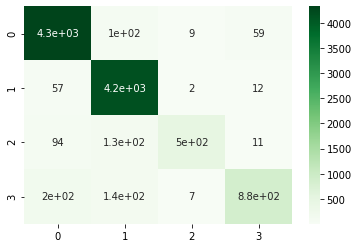

In [ ]:
## 可視化 seabornが便利
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(train_cnf_mtrix, annot=True, cmap='Greens')
plt.show()


## 56. 適合率，再現率，F1スコアの計測

52で学習したロジスティック回帰モデルの適合率，再現率，F1スコアを，評価データ上で計測せよ．カテゴリごとに適合率，再現率，F1スコアを求め，カテゴリごとの性能をマイクロ平均（micro-average）とマクロ平均（macro-average）で統合せよ．

### マイクロ平均とは
**クラスごと**にF1値を計算し、平均したもの
正解率の場合：𝑛𝑖回のテストのうち，𝑥𝑖回が正解の場合，マイクロ平均は次式：
$\frac{\sum_{i=1}^{N} x_i}{\sum_{i=1}^{N} n_i}$

### マクロ平均とは
**全クラス**のF1値を計算したもの
正解率の場合：𝑛𝑖回のテストのうち，𝑥𝑖回が正解の場合，マクロ平均は次式：
$\frac{1}{N}\sum_{i=1}^{N}\frac{x_i}{n_i}$

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

## 適合率
precision = precision_score(y_true=valid['CATEGORY'], y_pred=valid_pred, average=None, labels=['b', 'e', 't', 'm'])
precision = np.append(precision, precision_score(y_true=valid['CATEGORY'], y_pred=valid_pred, average='micro'))
precision = np.append(precision, precision_score(y_true=valid['CATEGORY'], y_pred=valid_pred, average='macro'))

## 再現率
recall = recall_score(y_true=valid['CATEGORY'], y_pred=valid_pred, average=None, labels=['b', 'e', 't', 'm'])
recall = np.append(recall, recall_score(y_true=valid['CATEGORY'], y_pred=valid_pred, average='micro'))
recall = np.append(recall, recall_score(y_true=valid['CATEGORY'], y_pred=valid_pred, average='macro'))

## F1スコア
f1 = f1_score(y_true=valid['CATEGORY'], y_pred=valid_pred, average=None, labels=['b', 'e', 't', 'm'])
f1 = np.append(f1, f1_score(y_true=valid['CATEGORY'], y_pred=valid_pred, average='micro'))
f1 = np.append(f1, f1_score(y_true=valid['CATEGORY'], y_pred=valid_pred, average='macro'))

scores = pd.DataFrame({'precision': precision, 'recall': recall, 'F1':f1}, index=['b', 'e', 't', 'm','micro ave', 'macro ave'])

In [ ]:
scores

,precision,recall,F1
b,0.908146,0.930728,0.919298
e,0.868243,0.971645,0.917038
t,0.838983,0.647059,0.730627
m,0.877551,0.472527,0.614286
micro ave,0.883234,0.883234,0.883234
macro ave,0.873231,0.755490,0.795312


## 57. 特徴量の重みの確認

52で学習したロジスティック回帰モデルの中で，重みの高い特徴量トップ10と，重みの低い特徴量トップ10を確認せよ．

特徴量の重みは .coef_ にて確認できる

In [ ]:
lr.coef_ ##[クラス数][単語数]のそれぞれの重み

array([[-0.11102864, -0.39583586,  0.30675547, ..., -0.60628092,
        -0.32440383,  0.47230731],
       [ 0.27262936, -0.00646911, -0.25842093, ...,  1.2387062 ,
         0.57719566, -0.47556982],
       [-0.1406825 ,  0.58304312, -0.0811077 , ..., -0.33314651,
        -0.10625097,  0.05484997],
       [-0.02091823, -0.18073816,  0.03277315, ..., -0.29927878,
        -0.14654086, -0.05158746]])

In [ ]:
lr.classes_

array(['b', 'e', 'm', 't'], dtype=object)

In [ ]:
vocabularys = X_train.columns

In [ ]:
print("カテゴリ:(b = business, e = entertainment, m = health, t = science and technology)\n")
for coef, class_name in zip(lr.coef_, lr.classes_):
  feature_v = dict(zip(vocabularys, coef))
  feature_v = sorted(feature_v.items(), key=lambda x:x[1], reverse=True)
  feature_v_top = feature_v[0:10]
  feature_v_bottom = feature_v[-10:]
  print("class : {} \n top : {}\n bottom : {}\n".format(class_name, feature_v_top, feature_v_bottom)) 

カテゴリ:(b = business, e = entertainment, m = health, t = science and technology)

class : b 
 top : [('bank', 6.529334200946615), ('ecb', 5.85644372684722), ('dollar', 5.157529189177367), ('obamacare', 5.102372444738146), ('yellen', 5.084987101083131), ('fed', 5.07261430957787), ('stocks', 4.95223248037221), ('euro', 4.633113709366206), ('china', 4.41248014879018), ('oil', 4.195876521177764)]
 bottom : [('charlie', -3.1034527575576085), ('heartbleed', -3.17089297482009), ('ebola', -3.173629893966417), ('once', -3.238429679134447), ('using', -3.248670073735452), ('recalled', -3.255533050492119), ('my', -3.2768248545259016), ('reality', -3.2878270669176084), ('aereo', -3.309498499707579), ('she', -3.486291963499616)]

class : e 
 top : [('transformers', 4.895988634149581), ('paul', 4.850351047843089), ('chris', 4.82177282429228), ('thrones', 4.795399275999571), ('kardashian', 4.41171873483412), ('cannes', 4.315256037020324), ('movie', 4.266181752835123), ('miley', 4.257266560269463), ('hbo

##58. 正則化パラメータの変更

ロジスティック回帰モデルを学習するとき，正則化パラメータを調整することで，学習時の過学習（overfitting）の度合いを制御できる．異なる正則化パラメータでロジスティック回帰モデルを学習し，学習データ，検証データ，および評価データ上の正解率を求めよ．実験の結果は，正則化パラメータを横軸，正解率を縦軸としたグラフにまとめよ．

[tips]  
tqdmを使うとプログレスバーが進捗が表示されて便利。tqdmにはイテラブルオブジェクトなら何でも渡せる。

In [ ]:
from tqdm import tqdm 
import time
for _ in tqdm(range(50)):
  time.sleep(0.1)

100%|██████████| 50/50 [00:05<00:00,  9.86it/s]


正則化とは？
>統計および機械学習において、正則化はモデルのパラメータの学習に使われ、特に過学習を防ぎ、汎化能力を高めるために使われる。

今回はsklearn.LogisticRegressionのパラメータCを調節して、正則化の強さをいじる。  
正則化の強さを変化させるとどう影響する？  
この問いについて以下サイトから引用[(パラメーター C　ロジスティック回帰のハイパーパラメーター)](http://harmonizedai.com/article/パラメーター-c%E3%80%80ロジスティック回帰のハイパーパ/)


> ロジスティック回帰にはCというパラメーターが存在します。  
このCはモデルが学習する識別境界線が教師データの分類間違いに対してどのくらい厳しくするのかという指標になります。   

> Cの値が大きいほどモデルは教師データを完全に分類できるような識別線を学習するようになります。
しかし教師データに対して過剰なほどの学習を行うために過学習に陥り、訓練データ以外のデータに予測を行うと正解率が下がる場合が多くなります。  

>Cの値を小さくすると教師データの分類の誤りに寛容になります。  
分類間違いを許容することで外れ値データに境界線が左右されにくくなりより一般化された境界線を得やすくなります。  

>ただし、外れ値の少ないデータでは境界線がうまく識別できていないものになってしまう場合もあります。  
また、極端に小さくてもうまく境界線が識別できません。  
scikit-learnのロジスティック回帰モデルのCの初期値は1.0です。


つまり、正則化の強さを変化させて、ある程度正答率を保ったまま、過学習を防ぐことが重要である。   
ここで、「正則化が弱い」＝「Cが大きい」＝「誤りに厳しい」であり、   
「正則化が強い」＝「Cが小さい」＝「誤りに寛容」である。勘違い注意。


In [ ]:
result_58 = []
for C in tqdm(np.logspace(-6, 4 ,11, base=10)):
  lr = LogisticRegression(random_state=123, max_iter=1000 , C=C)
  lr.fit(X_train, train['CATEGORY'])

  train_pred = lr.predict(X_train)
  valid_pred = lr.predict(X_valid)
  test_pred = lr.predict(X_test)

  train_accuracy = accuracy_score(train['CATEGORY'], train_pred)
  valid_accuracy = accuracy_score(valid['CATEGORY'], valid_pred)
  test_accuracy = accuracy_score(test['CATEGORY'], test_pred)

  result_58.append([C, train_accuracy, valid_accuracy, test_accuracy])

 91%|█████████ | 10/11 [04:27<01:01, 61.20s/it]/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
100%|██████████| 11/11 [06:47<00:00, 37.00s/it]


In [ ]:
df_58 = pd.DataFrame(result_58, columns=['C', 'train_accuracy', 'valid_accuracy', 'test_accuracy'])

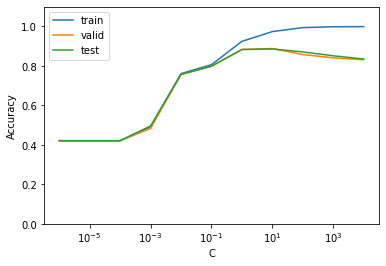

In [ ]:
plt.plot(df_58['C'], df_58['train_accuracy'], label='train')
plt.plot(df_58['C'], df_58['valid_accuracy'], label='valid')
plt.plot(df_58['C'], df_58['test_accuracy'], label='test')
plt.xscale('log')
plt.ylim(0,1.1)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Cが大きくなると、過学習が防げずにvalid,testの正答率が減少しているのが確認できる。

In [ ]:
df_58

,C,train_accuracy,valid_accuracy,test_accuracy
0,0.000001,0.421284,0.421407,0.421407
1,0.000010,0.421284,0.421407,0.421407
2,0.000100,0.421284,0.421407,0.421407
3,0.001000,0.492044,0.483533,0.496257
4,0.010000,0.760857,0.756737,0.756737
5,0.100000,0.805972,0.797156,0.798653
6,1.000000,0.923905,0.883234,0.882485
7,10.000000,0.973325,0.887725,0.885479
8,100.000000,0.993542,0.857036,0.870509
9,1000.000000,0.997754,0.840569,0.851048


In [ ]:
df_58['C'][df_58['test_accuracy'].idxmax()]

10.0

C=10のときが最もテストデータでは高い正答率であった。

##59. ハイパーパラメータの探索

学習アルゴリズムや学習パラメータを変えながら，カテゴリ分類モデルを学習せよ．検証データ上の正解率が最も高くなる学習アルゴリズム・パラメータを求めよ．また，その学習アルゴリズム・パラメータを用いたときの評価データ上の正解率を求めよ．

sklearn.LogisticRegressionのハイパーパラメータを以下にまとめる。  
参考：[ロジスティック回帰(分類)とハイパーパラメータのチューニング](https://qiita.com/FujiedaTaro/items/5784eda386146f1fd6e7)  

|ハイパーパラメータ|説明|選択肢|default|
|:---|:---|:---|:---|
|penalty|正則化の仕方を決めるパラメータ。[L1,L2の違いについて](https://panda-clip.com/param-c-logreg/)|l1,l2,elasticnet|l2|
|dual|双対問題を解くか主問題を解くかの指定|bool型|False|
|tol|計算を停止するための基準．小さいと探索時間がかかる．|float型|0.0001|
|C|正則化の強度|float型|1|
|fit_intercept|バイアス項を最適化しない場合，False を指定|bool型|True|
|intercept_scaling|インプットベクトルの要素に intercept_scaling で指定した値が追加される．<br>このときのバイアス項は intercept_scaling * synthetic_feature_weight で計算される値となる．|float型|1|
|class_weight|クラスの重み|辞書型、balanced|1(全クラス)|
|random_state|乱数のシード値|int型|None|
|solver|最適パラメータ探索アルゴリズム|newton-cg、lbfgs、liblinear、sag、saga|liblinear|
|max_iter|最適解探索の際の最大探索回数を指定|int型|100|
|multi_class|多クラスを分類する場合において，あるインスタンスを対象のクラスにいれるか,<br>それ以外に入れるか (one-versus-rest, ovr) という二値分類の拡張か，多クラス分類をするかの指定|ovr、multinomial、auto|ovr|
|verbose|モデル構築の過程のメッセージを出すかどうか|int型|0|
|warm_start|Trueにすると再学習時にモデルを初期化しない|bool型|False|
|n_jobs|フィットおよび予測の際に用いるスレッドの数を指定|int型、None|None|
|l1_ratio|L1正則化とL2正則化のバランス|float、None|None|

今回は機械学習モデルのハイパーパラメーターの最適化の為に作られたベイズ最適化packageである[Optuna](https://tech.preferred.jp/ja/blog/optuna-release/)を使用する。

L1の正則化は、wの数値の多くが0になるようにし、次元圧縮を行います。  
L2の正則化は、wの数値をできるだけ0に近づけていこうという方向性でモデルの複雑化を防ごうとします。

In [ ]:
!pip install optuna

In [ ]:
import optuna

問58では、10の累乗刻みの場合C=10のときが最も正答率が高かった。  
問59では、累乗刻みでなく実際の値を求める。

In [ ]:
def objective_lr(trial):
  C = trial.suggest_uniform('C', 1e-4, 1e4)
  lr = LogisticRegression(random_state=123, max_iter=1000 , C=C)
  lr.fit(X_train, train['CATEGORY'])
  valid_pred = lr.predict(X_valid)
  valid_accuracy = accuracy_score(valid['CATEGORY'], valid_pred)
  return valid_accuracy

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective_lr, timeout=3600)

[I 2021-01-26 07:48:40,385] A new study created in memory with name: no-name-28427007-60b0-4256-ab0a-b0c472cf983f
[I 2021-01-26 07:50:25,976] Trial 0 finished with value: 0.844311377245509 and parameters: {'C': 390.8936572657477}. Best is trial 0 with value: 0.844311377245509.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

[I 2021-01-26 07:52:46,251] Trial 1 finished with value: 0.8360778443113772 and parameters: {'C': 3720.4553298271935}. Best is trial 0 with value: 0.844311377245509.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: Con

In [ ]:
study.best_params ##　best_valueを出したときのパラメータ

{'C': 7.930467696151643}

In [ ]:
study.best_value ## 一番良いスコア

0.8884730538922155

In [ ]:
study.best_trial ## best_valueを出したときの施行内容

FrozenTrial(number=29, values=[0.8884730538922155], datetime_start=datetime.datetime(2021, 1, 26, 8, 45, 3, 589320), datetime_complete=datetime.datetime(2021, 1, 26, 8, 45, 34, 517353), params={'C': 7.930467696151643}, distributions={'C': UniformDistribution(high=10000.0, low=0.0001)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=29, state=TrialState.COMPLETE, value=None)

C=7.93のとき、0.888と最も高い正答率であることがわかった。  
→この場合，モデルの評価には評価データを使うのではなく，テストデータで評価しなければいけない．  
(最適化に評価データを用いると，それも訓練データと同じやん！となる)


In [ ]:
lr = LogisticRegression(random_state=123, max_iter=1000 , C=7.93)
lr.fit(X_train, train['CATEGORY'])
train_pred = lr.predict(X_train)
valid_pred = lr.predict(X_valid)
test_pred = lr.predict(X_test)

train_accuracy = accuracy_score(train['CATEGORY'], train_pred)
valid_accuracy = accuracy_score(valid['CATEGORY'], valid_pred)
test_accuracy = accuracy_score(test['CATEGORY'], test_pred)

print(f'正解率（学習データ）：{train_accuracy:.3f}')
print(f'正解率（検証データ）：{valid_accuracy:.3f}')
print(f'正解率（評価データ）：{test_accuracy:.3f}')


正解率（学習データ）：0.970
正解率（検証データ）：0.888
正解率（評価データ）：0.885


他の探索アルゴリズムも試してみる。（newton-cg、lbfgs、sag、saga）

In [ ]:
## solver = newton-cg
lr = LogisticRegression(random_state=123, max_iter=1000 , C=7.93, solver='newton-cg')
lr.fit(X_train, train['CATEGORY'])
train_pred = lr.predict(X_train)
valid_pred = lr.predict(X_valid)
test_pred = lr.predict(X_test)

train_accuracy = accuracy_score(train['CATEGORY'], train_pred)
valid_accuracy = accuracy_score(valid['CATEGORY'], valid_pred)
test_accuracy = accuracy_score(test['CATEGORY'], test_pred)

print(f'正解率（学習データ）：{train_accuracy:.3f}')
print(f'正解率（検証データ）：{valid_accuracy:.3f}')
print(f'正解率（評価データ）：{test_accuracy:.3f}')

正解率（学習データ）：0.970
正解率（検証データ）：0.888
正解率（評価データ）：0.885


In [ ]:
## solver = lbfgs
lr = LogisticRegression(random_state=123, max_iter=1000 , C=7.93, solver='lbfgs')
lr.fit(X_train, train['CATEGORY'])
train_pred = lr.predict(X_train)
valid_pred = lr.predict(X_valid)
test_pred = lr.predict(X_test)

train_accuracy = accuracy_score(train['CATEGORY'], train_pred)
valid_accuracy = accuracy_score(valid['CATEGORY'], valid_pred)
test_accuracy = accuracy_score(test['CATEGORY'], test_pred)

print(f'正解率（学習データ）：{train_accuracy:.3f}')
print(f'正解率（検証データ）：{valid_accuracy:.3f}')
print(f'正解率（評価データ）：{test_accuracy:.3f}')

正解率（学習データ）：0.970
正解率（検証データ）：0.888
正解率（評価データ）：0.885


In [ ]:
## solver = sag
lr = LogisticRegression(random_state=123, max_iter=1000 , C=7.93, solver='sag')
lr.fit(X_train, train['CATEGORY'])
train_pred = lr.predict(X_train)
valid_pred = lr.predict(X_valid)
test_pred = lr.predict(X_test)

train_accuracy = accuracy_score(train['CATEGORY'], train_pred)
valid_accuracy = accuracy_score(valid['CATEGORY'], valid_pred)
test_accuracy = accuracy_score(test['CATEGORY'], test_pred)

print(f'正解率（学習データ）：{train_accuracy:.3f}')
print(f'正解率（検証データ）：{valid_accuracy:.3f}')
print(f'正解率（評価データ）：{test_accuracy:.3f}')

正解率（学習データ）：0.970
正解率（検証データ）：0.888
正解率（評価データ）：0.885


In [ ]:
## solver = saga
lr = LogisticRegression(random_state=123, max_iter=1000 , C=7.93, solver='saga')
lr.fit(X_train, train['CATEGORY'])
train_pred = lr.predict(X_train)
valid_pred = lr.predict(X_valid)
test_pred = lr.predict(X_test)

train_accuracy = accuracy_score(train['CATEGORY'], train_pred)
valid_accuracy = accuracy_score(valid['CATEGORY'], valid_pred)
test_accuracy = accuracy_score(test['CATEGORY'], test_pred)

print(f'正解率（学習データ）：{train_accuracy:.3f}')
print(f'正解率（検証データ）：{valid_accuracy:.3f}')
print(f'正解率（評価データ）：{test_accuracy:.3f}')

正解率（学習データ）：0.970
正解率（検証データ）：0.888
正解率（評価データ）：0.885


探索アルゴリズムを変化させても、正解率の変化は見られなかった。